<h1><center>New York Pay-Roll Analysis</center></h1>

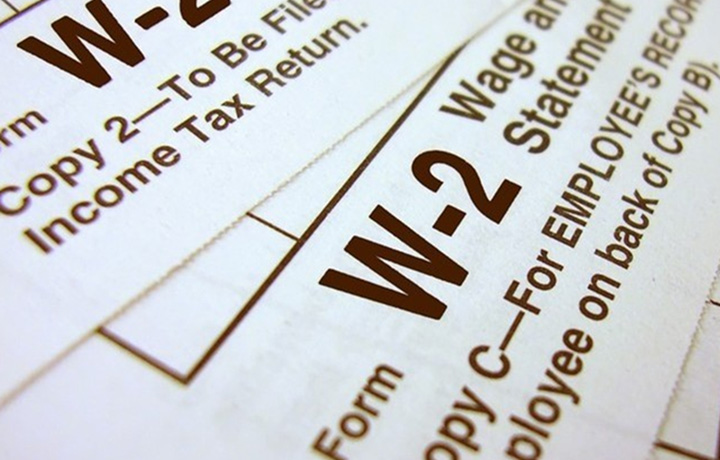

#### 

In [1]:
import os
import sqlite3
import pandas as pd
from sqlite3 import Error
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
import matplotlib.style as style
sns.set_context('talk')
sns.set()
plt.rcParams["figure.dpi"] = 300

<h2><center>Pre-Processing and Database Creation</center></h2>

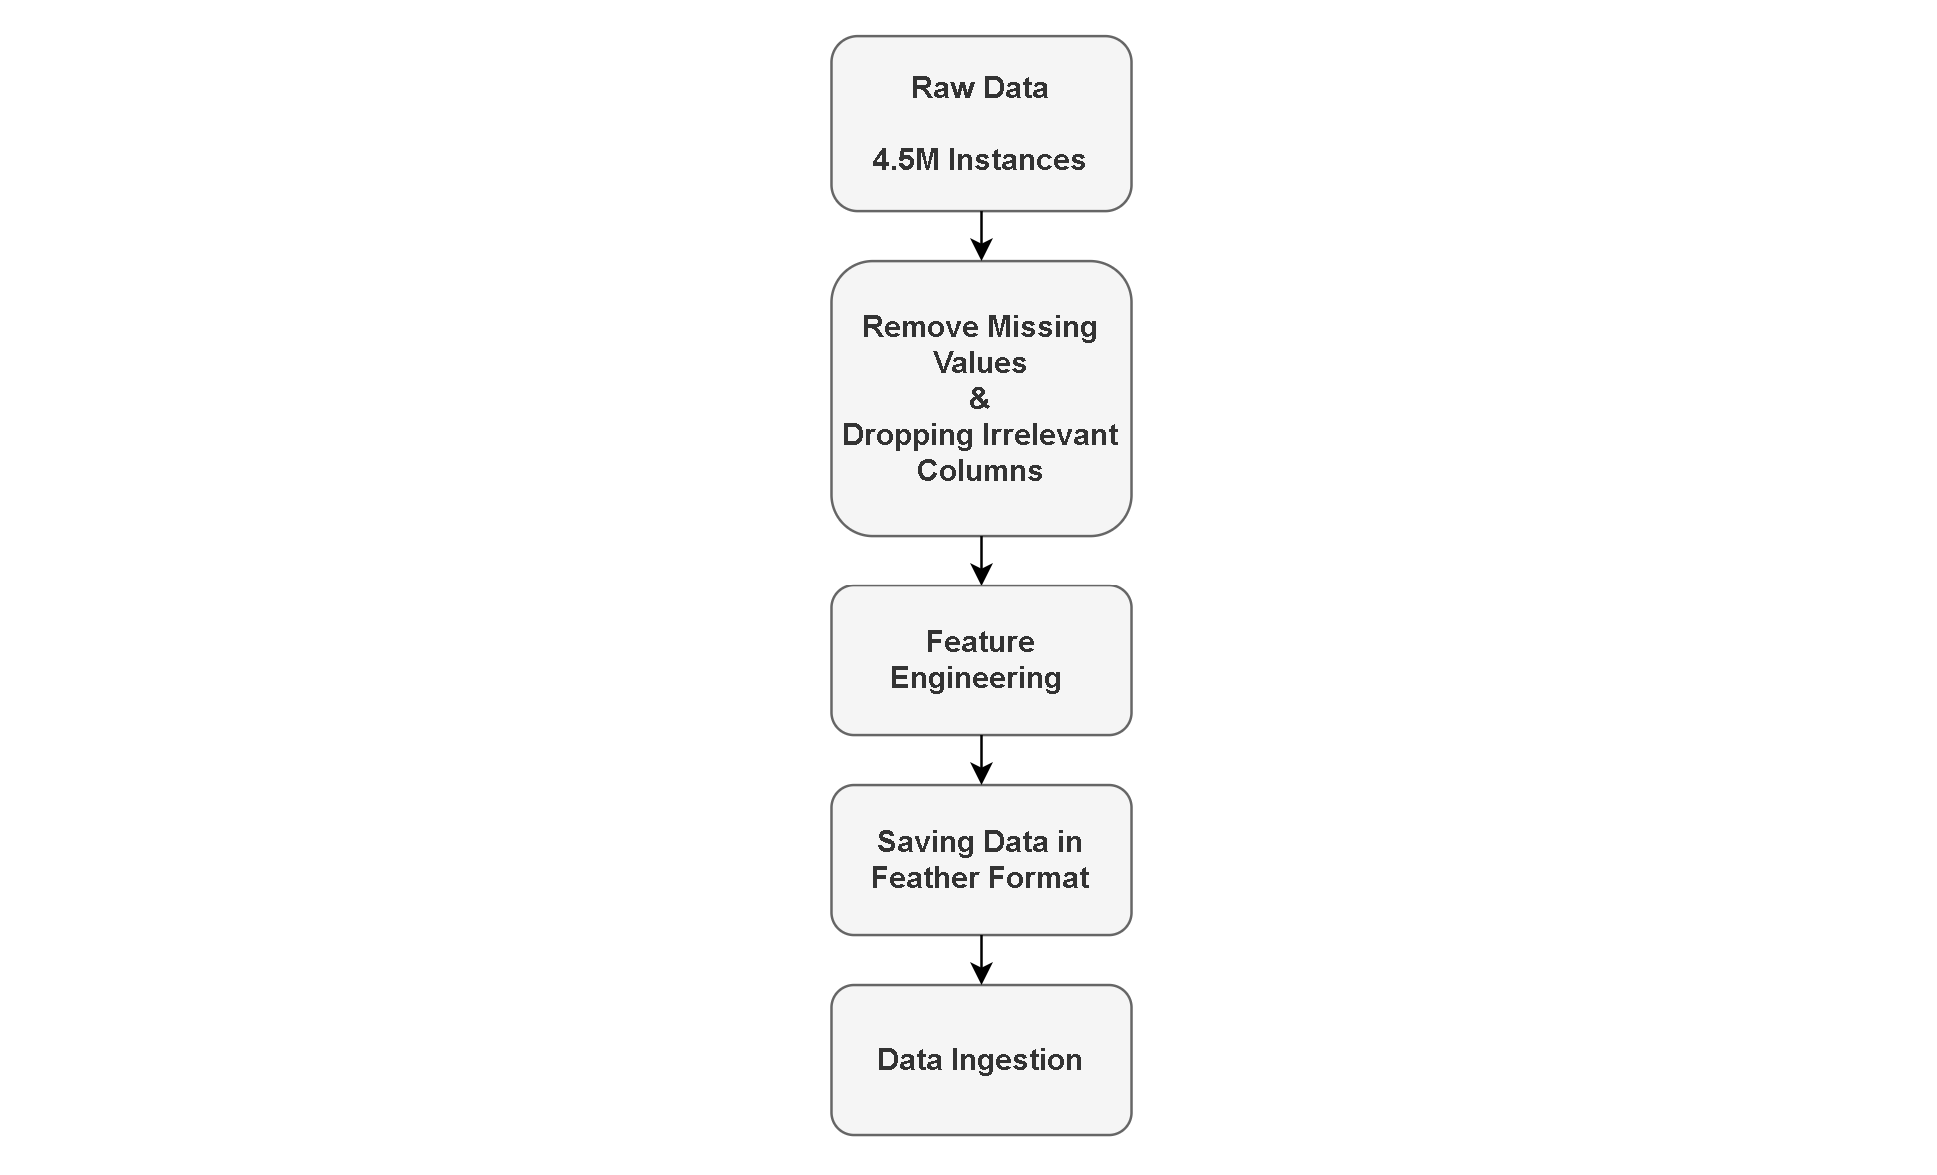

In [2]:
def create_connection(db_file, delete_db=False):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


PATH = os.getcwd()
conn = create_connection(os.path.join(PATH,"nyc-payroll.db"))

#Visualise categories.
with conn:
    sql1 = "select RegularHoursCategory, OTHoursCategory, HourlyPayCategory, TotalPayCategory from Income;"
    df1 = pd.read_sql_query(sql1, conn)

    sql2 = "select BaseSalary, WorkLocation from Designation ;"
    df2 = pd.read_sql_query(sql2, conn)
    
    sql3 = "SELECT CAST(CAST(SUM(TotalOTPay) AS FLOAT) AS bigint) as spendOnOT from Income;"
    df3 = pd.read_sql_query(sql3, conn)
    
    sql4 = "Select p.AgencyName as agencyName, CAST(CAST(SUM(OTHours) AS FLOAT) AS bigint) as OTHours, CAST(CAST(SUM(TotalOTPay) AS FLOAT) AS bigint) as TotalOTPay from Income i JOIN Employee e ON i.EmployeeID == e.EmployeeID JOIN PayRoll p ON e.PayRollNo == p.PayRollNo GROUP BY agencyName ORDER BY OTHours DESC, TotalOTPay  LIMIT 25;"
    df4 = pd.read_sql_query(sql4, conn)
    
    
    sql5 = "SELECT e.FiscalYear as Year, CAST(CAST(SUM(TotalOTPay) AS FLOAT) AS bigint) as spendOnOT from Income i JOIN Employee e ON i.EmployeeID == e.EmployeeID GROUP BY Year;"
    df5 = pd.read_sql_query(sql5, conn)
    
    
    sql6 = "SELECT e.FiscalYear as Year, p.AgencyName as agencyName, CAST(CAST(SUM(TotalOTPay) AS FLOAT) AS bigint) as spendOnOT from Income i JOIN Employee e ON i.EmployeeID == e.EmployeeID JOIN PayRoll p ON e.PayRollNo == p.PayRollNo GROUP BY Year, agencyName ORDER BY spendOnOT DESC LIMIT 50;"
    df6 = pd.read_sql_query(sql6, conn)
    
    sql7 = "Select r.AgencyName as Agency, CAST(CAST(SUM(i.TotalPay) AS FLOAT) AS bigint) as totalPay from Income i JOIN Employee e ON i.EmployeeID == e.EmployeeID JOIN PayRoll r ON e.PayRollNo == r.PayRollNo GROUP BY Agency ORDER BY totalPay DESC LIMIT 25;"
    df7 = pd.read_sql_query(sql7, conn)
    
    sql8 = "Select e.FiscalYear as Year, d.WorkLocation as Location, CAST(CAST(SUM(i.TotalPay) AS FLOAT) AS bigint) as totalPay from Income i JOIN Designation d ON i.EmployeeID == d.EmployeeID JOIN Employee e ON i.EmployeeID == e.EmployeeID GROUP BY Location, Year ORDER BY totalPay DESC LIMIT 28;"
    df8 = pd.read_sql_query(sql8, conn)
        
    sql9 = "Select d.TitleDescription as Designation, CAST(CAST(SUM(i.TotalPay) AS FLOAT) AS bigint) as totalPay from Income i JOIN Designation d on i.EmployeeID == d.EmployeeID GROUP BY d.TitleDescription ORDER BY totalPay DESC LIMIT 25;"
    df9 = pd.read_sql_query(sql9, conn)
    
    sql10 = "Select e.FirstName || ' ' || e.LastName AS employeeName, d.TitleDescription as Designation, d.WorkLocation as Location, i.OTHours as totalOTHours from Income i JOIN Employee e ON i.EmployeeID == e.EmployeeID JOIN Designation d ON i.EmployeeID == d.EmployeeID ORDER BY totalOTHours DESC LIMIT 25;"
    df10 = pd.read_sql_query(sql10, conn)
    
    sql11 = "Select d.TitleDescription as Designation, CAST(CAST(d.BaseSalary AS FLOAT) AS bigint) as Pay from Income i JOIN Designation d on i.EmployeeID == d.EmployeeID JOIN Employee e ON i.EmployeeID == e.EmployeeID WHERE e.PayBasis == 'per Annum' GROUP BY Designation ORDER BY Pay DESC LIMIT 25;"
    df11 = pd.read_sql_query(sql11, conn)
    
    sql12 = "Select d.TitleDescription as Designation, CAST(CAST(d.BaseSalary AS FLOAT) AS bigint) as Pay from Income i JOIN Designation d on i.EmployeeID == d.EmployeeID JOIN Employee e ON i.EmployeeID == e.EmployeeID WHERE e.PayBasis == 'per Annum' AND Pay > 11 GROUP BY Designation ORDER BY Pay LIMIT 25;"
    df12 = pd.read_sql_query(sql12, conn)
    
    sql13 = "Select TitleDescription AS Designation, COUNT(TitleDescription) AS NoOfEmps from Designation GROUP BY Designation ORDER BY NoOfEmps DESC LIMIT 25;"
    df13 = pd.read_sql_query(sql13, conn)

<h2><center>Database Schema</center></h2>

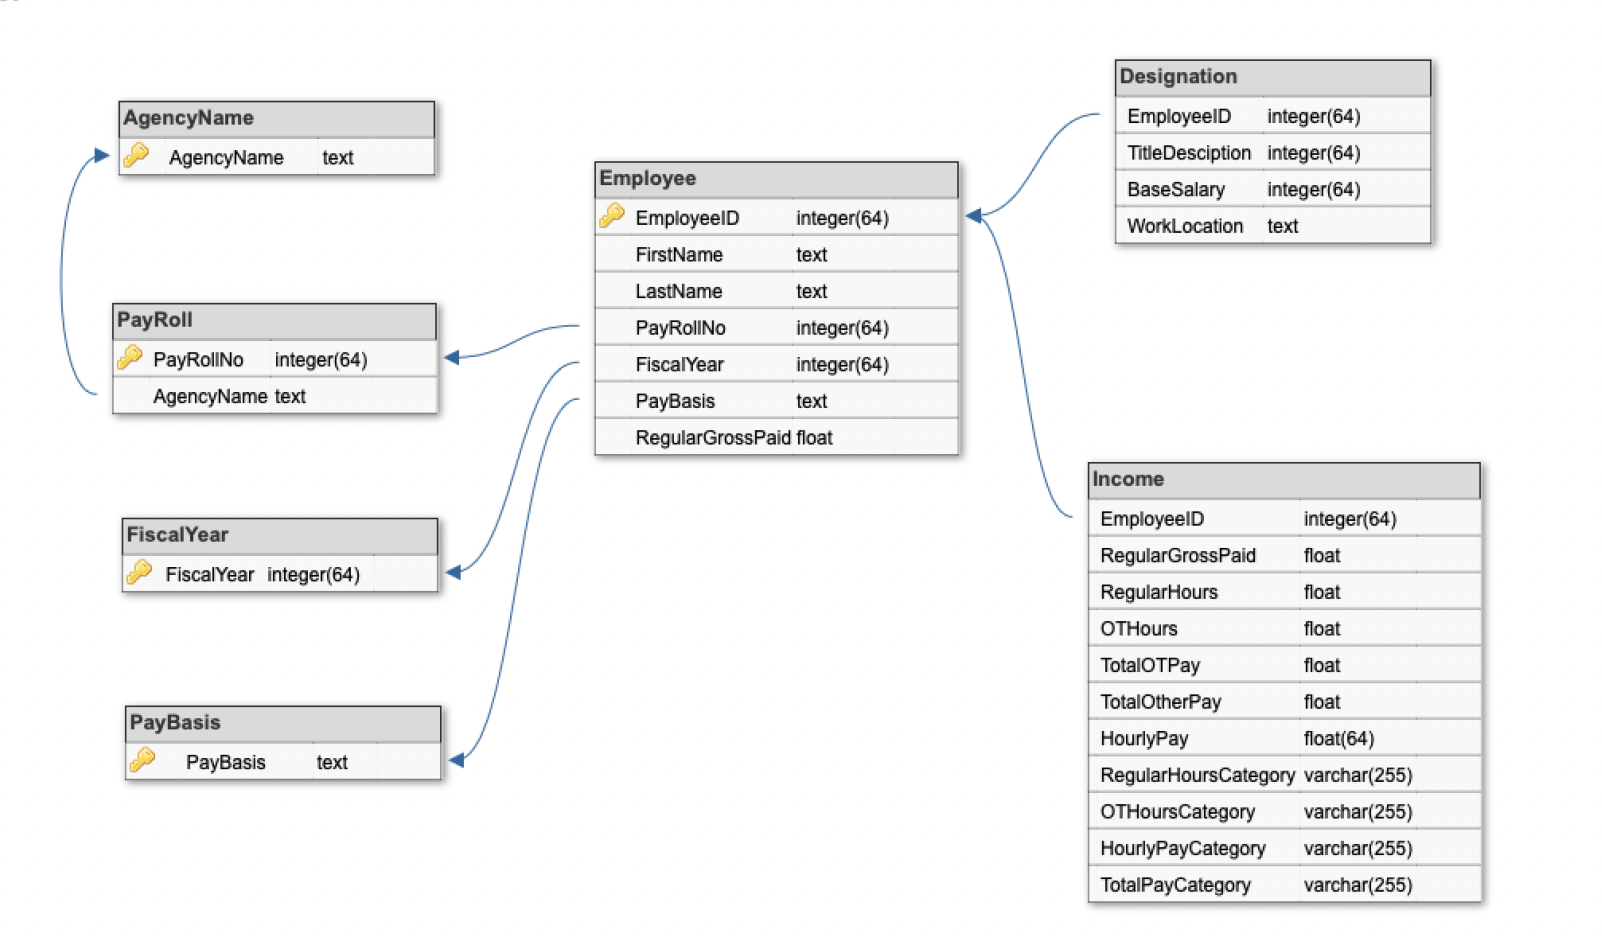

### 

In [5]:
def func(Plot):
    if Plot=="Regular hours category":
        temp = pd.DataFrame(df1['RegularHoursCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
        plt.figure(figsize=(12,6), dpi=300)
        sns.barplot(data=temp, x='Count',y='RegularHoursCategory', alpha=0.7);
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.title("Regular Hours of Employees")
        plt.tight_layout()
        
    elif Plot=="Over time hours category":
        temp = pd.DataFrame(df1['OTHoursCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
        plt.figure(figsize=(12,6), dpi=300)
        sns.barplot(data=temp, x='Count',y='OTHoursCategory', alpha=0.7);
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.title("Over Time Hours of Employees")
        plt.tight_layout()
    
    elif Plot=="Total pay category":
        temp = pd.DataFrame(df1['TotalPayCategory'].value_counts()[:-1].reset_index()).rename(columns={"index":"Count"})
        plt.figure(figsize=(17,8), dpi=300)
        sns.barplot(data=temp, x='Count',y='TotalPayCategory', alpha=0.7);
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.title("Total Pay of Employees")
        plt.tight_layout()
    
    elif Plot=="Hourly pay category":
        temp = pd.DataFrame(df1['HourlyPayCategory'].value_counts().reset_index()).rename(columns={"index":"Count"})
        plt.figure(figsize=(17,6), dpi=300)
        sns.barplot(data=temp, x='Count',y='HourlyPayCategory', alpha=0.7);
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.title("Hourly Pay of Employees")
        plt.tight_layout()
        
    elif Plot=="Average base salary for each location":
        plt.figure(figsize=(12,6), dpi=300)
        df_base = df2.groupby('WorkLocation', as_index=False)['BaseSalary'].mean()
        sns.barplot(data=df_base, x='BaseSalary',y='WorkLocation', alpha=0.7);
        plt.xlabel('Base Salary $')
        plt.ylabel('Work Location')
        plt.tight_layout()
        
    elif Plot=="Agencies that Worked Most OT through 2014 - 2021":
        fig,ax = plt.subplots(figsize=(12,6),dpi=300)
        #plt.figure(figsize=(12,6),dpi=300)
        df4['agency'] = df4.index
        sns.scatterplot(data=df4, x='agency', y='OTHours')
        x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(df4.index,df4['agencyName']))
        t = ax.text(.7,.2,x_legend,transform=ax.figure.transFigure)
        fig.subplots_adjust(right=.65)
        plt.tight_layout()
        plt.ylabel('OT Hours in Millions')
        plt.show()
        
    elif Plot=="Budget Spent by All Agencies on Over Time Each Year":
        plt.figure(figsize=(11,5),dpi=300)
        sns.barplot(data=df5, x = 'Year', y = 'spendOnOT',alpha=0.7)
        #df5.plot.bar(x = 'Year', y = 'spendOnOT', color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6'], legend = False)
        plt.ylabel('Budget in Billions')
        plt.xlabel('Year')
        plt.title('Budget Spent by All Agencies  on Over Time Each Year')
        plt.tight_layout()
    
    elif Plot=="Top 10 Agencies that Spent Most Budget on Over Time Each Year":
        #plt.figure(figsize=(12,6),dpi=300)
        temp = df6.pivot(index='Year', columns='agencyName', values='spendOnOT')
        temp.plot(style='.-',figsize=(13,6))
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.ylabel('Budget in 100 Millions')
        plt.xlabel('Year')
        plt.title('Top 10 Agencies that Spent Most Budget on Over Time Each Year')
        plt.tight_layout()
        
    elif Plot=="Top 10 Agencies that Spent Most Budget Overall":
        #plt.figure(figsize=(12,6),dpi=300);
        df7['AgencyNo'] = df7.index
        fig,ax = plt.subplots(figsize=(12,6),dpi=300);
        sns.lineplot(data=df7, x='AgencyNo', y='totalPay');
        x_legend = '\n'.join(f'{n} - {name}' for n,name in zip(df7.index,df7['Agency']))
        t = ax.text(.7,.2,x_legend,transform=ax.figure.transFigure)
        fig.subplots_adjust(right=.65);
        plt.ylabel('Budget in Billions')
        plt.xlabel('Agency No.')
        plt.title('Top 10 Agencies that Spent Most Budget Each Overall')
        plt.tight_layout()
        
    elif Plot=="Budget Spent by Boroughs of NYC":
        #plt.figure(figsize=(12,6),dpi=300)
        temp = df8.pivot(index='Year', columns='Location', values='totalPay')
        temp.plot(style='.-',figsize=(12,6))
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.ylabel('Budget in Billions')
        plt.xlabel('Years')
        plt.title('Budget Spent by Boroughs of NYC')
        plt.tight_layout()
        plt.show()
        
    elif Plot=="Designations with Highest Funding":
        #plt.figure(figsize=(12,6),dpi=300)
        temp = df9.set_index('Designation')
        temp.plot.pie(y='totalPay', legend=False, figsize=(10,10), autopct='%1.2f%%')
        plt.tight_layout()
        
    elif Plot=="Top 25 HardWorking Employees":
        #plt.figure(figsize=(12,6),dpi=300)
        df10.plot.barh(x = 'employeeName', y = 'totalOTHours', color=['C2'], legend = False,figsize=(12,7))
        plt.ylabel('Employee Name')
        plt.xlabel('Total OT Hours')
        plt.title('Top 25 HardWorking Employees')
        plt.tight_layout()
        
    elif Plot=="Top 25 Highest Paid Jobs":
        #plt.figure(figsize=(12,6),dpi=300)
        df11.plot.barh(x = 'Designation', y = 'Pay', color=['C0'], legend = False,figsize=(12,7))
        plt.ylabel('Designation')
        plt.xlabel('Pay')
        plt.title('Top 25 Highest Paid Jobs')
        plt.tight_layout()
        
    elif Plot=="Top 25 Lowest Paid Jobs":
        #plt.figure(figsize=(12,6),dpi=300)
        df12.plot.barh(x = 'Designation', y = 'Pay', color=['C3'], legend = False, figsize=(12,7))
        plt.ylabel('Designation')
        plt.xlabel('Pay')
        plt.title('Top 25 Lowest Paid Jobs')
        plt.tight_layout()
        
    elif Plot=="Top 25 Most Employeed Jobs":
        fig=plt.figure(figsize=(12,7), dpi=300)
        sns.set_style("darkgrid")
        y = df13['Designation']
        x = df13['NoOfEmps']
        plt.plot(x, y, 'o--r');
        plt.xlabel('No Of Employees');
        plt.ylabel('Designation');
        plt.title('Top 25 Most Employeed Jobs')
        plt.tight_layout()

# 

In [6]:
interact(func, Plot= ['Regular hours category','Over time hours category', 'Total pay category','Hourly pay category',
                     'Average base salary for each location',
                      'Agencies that Worked Most OT through 2014 - 2021','Budget Spent by All Agencies on Over Time Each Year',
                     'Top 10 Agencies that Spent Most Budget on Over Time Each Year','Top 10 Agencies that Spent Most Budget Overall',
                     'Budget Spent by Boroughs of NYC','Designations with Highest Funding','Top 25 HardWorking Employees',
                     'Top 25 Highest Paid Jobs','Top 25 Lowest Paid Jobs','Top 25 Most Employeed Jobs']);

interactive(children=(Dropdown(description='Plot', options=('Regular hours category', 'Over time hours categor…